# Board games object tracking

Add the video files from shared [folder](https://drive.google.com/drive/folders/1CAKG0U1ZXzRS02MkrOCM3pTlMjBN6GFb?usp=share_link)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL
import os
import sys
import glob
import random

from pprint import pprint
from IPython.display import Video

from PIL import Image
from PIL.ExifTags import TAGS

paths = glob.glob('./data/*.mp4')
paths
# for name in os.listdir('./data/'):
#   x = name[:-4].split('_')
#   print(x)


['./data\\catan_lvl1_1.mp4',
 './data\\catan_lvl1_2.mp4',
 './data\\catan_lvl1_3.mp4',
 './data\\catan_lvl1_4.mp4',
 './data\\catan_lvl2_1.mp4',
 './data\\catan_lvl3_1.mp4',
 './data\\catan_lvl3_2.mp4',
 './data\\catan_lvl3_3.mp4',
 './data\\cyklady_lvl1_1.mp4',
 './data\\cyklady_lvl1_2.mp4',
 './data\\cyklady_lvl1_3.mp4',
 './data\\cyklady_lvl1_4.mp4',
 './data\\cyklady_lvl1_5.mp4',
 './data\\cyklady_lvl1_6.mp4',
 './data\\cyklady_lvl2_1.mp4',
 './data\\cyklady_lvl2_2.mp4',
 './data\\cyklady_lvl3_1.mp4',
 './data\\cyklady_lvl3_2.mp4',
 './data\\cyklady_lvl3_3.mp4']

In [2]:
if 'google.colab' in str(get_ipython()):
  from google.colab.patches import cv2_imshow
  imshow = cv2_imshow
else:
  def imshow(a):
    a = a.clip(0, 255).astype('uint8')
    if a.ndim == 3:
      if a.shape[2] == 4:
        a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
      else:
        a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display(PIL.Image.fromarray(a))


## Catan

In [3]:
video = cv2.VideoCapture(paths[0])
if video.isOpened():
    print('Video loaded')
video_width = int(video.get(3))
video_height = int(video.get(4))

print(video_height, video_width)

video_fps = video.get(cv2.CAP_PROP_FPS)
print(video_fps)


Video loaded
1088 1920
29.99921729331011


In [4]:
# Video('./data/catan_lvl1_1.mp4', height=540, width=960)

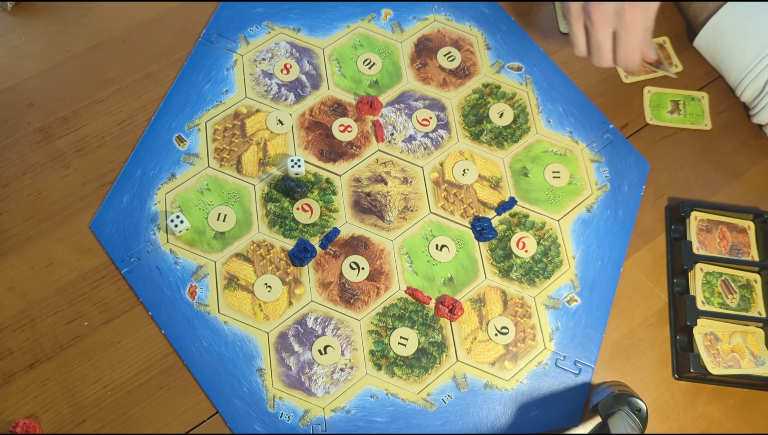

In [5]:
first_frame = None
while True:
    ret, frame = video.read()
    if ret:
        imshow(cv2.resize(frame, None, fx=0.4, fy=0.4))
        first_frame = frame
        break
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break


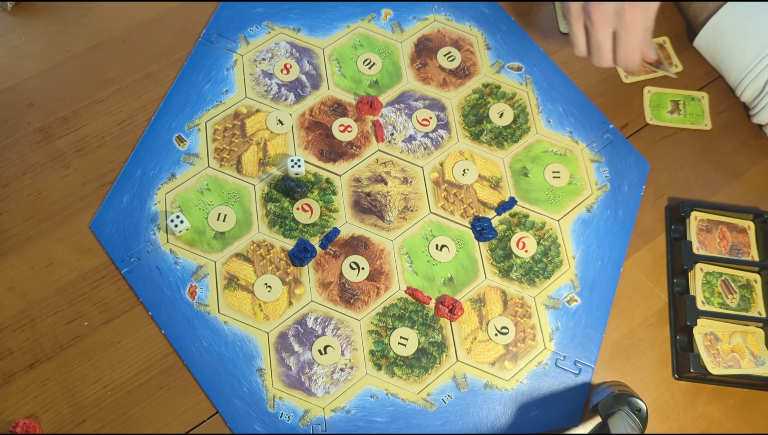

In [6]:
imshow(cv2.resize(first_frame, None, fx=0.4, fy=0.4))


In [7]:
def segment_by_blue(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([110, 50, 50])
    upper_blue = np.array([130, 255, 255])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    return mask

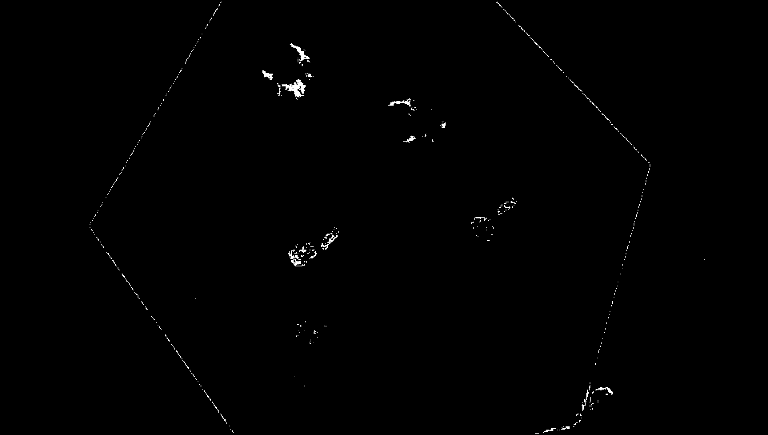

In [8]:
imshow(cv2.resize(segment_by_blue(first_frame), None, fx=0.4, fy=0.4))

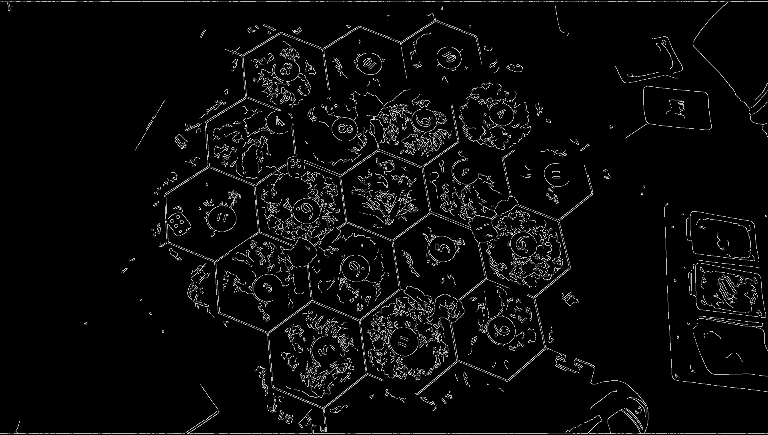

In [43]:
def detect_edges(frame, low_threshold=70, high_threshold=190):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    edges = cv2.Canny(blur, low_threshold, high_threshold, apertureSize=3)
    return edges


imshow(cv2.resize(detect_edges(first_frame), None, fx=0.4, fy=0.4))


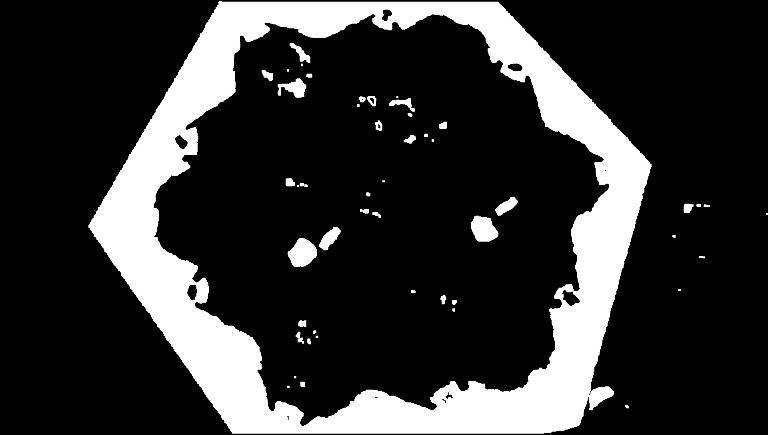

In [10]:
hsv = cv2.cvtColor(first_frame, cv2.COLOR_BGR2HSV)
blur = cv2.GaussianBlur(hsv, (7, 7), 0)
blue = cv2.inRange(blur, (100, 50, 50), (140, 255, 255))
# eroded = cv2.erode(blue, np.ones((7,7), np.uint8), iterations=3)
dilated = cv2.dilate(blue, np.ones((3, 3), np.uint8), iterations=2)
imshow(cv2.resize(dilated, None, fx=0.4, fy=0.4))


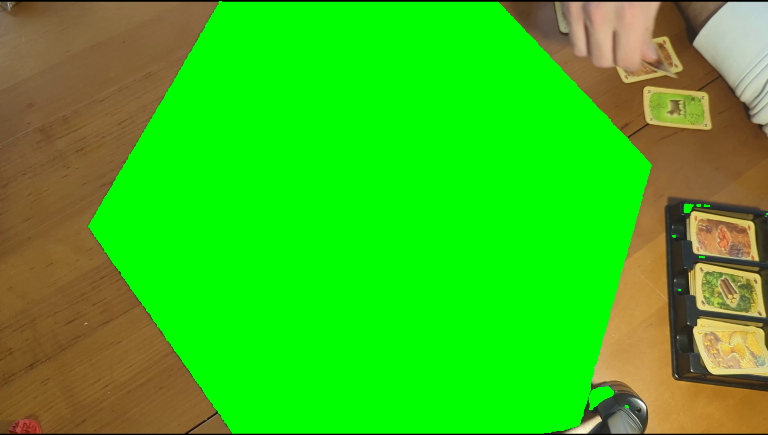

In [11]:
contours, hierarchy = cv2.findContours(dilated,
                                       cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
new = first_frame.copy()
filled = cv2.drawContours(new, contours, -1, (0,255,0), -3)
imshow(cv2.resize(filled, None, fx=0.4, fy=0.4))


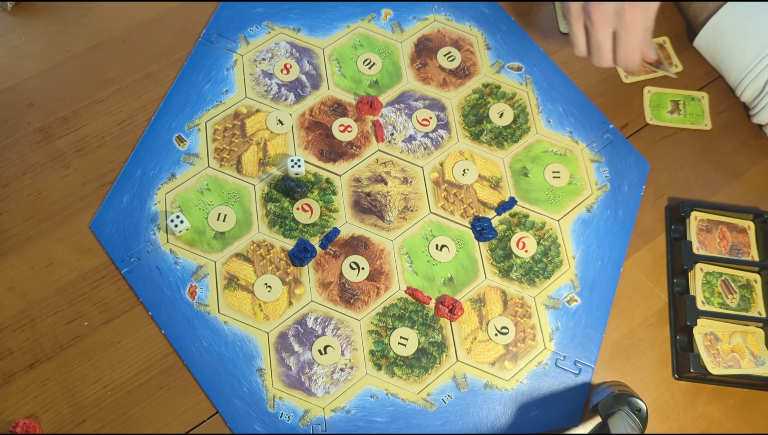

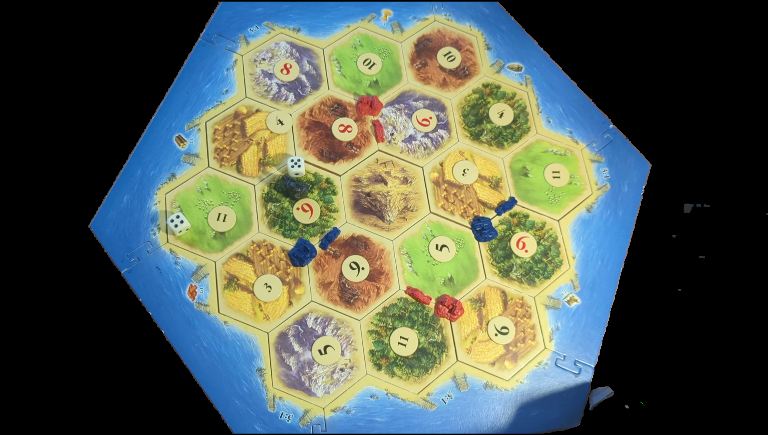

In [12]:
new = first_frame.copy()
imshow(cv2.resize(new, None, fx=0.4, fy=0.4))
new[filled != [0,255,0]] = 0
# new[dilated > 0] = 0
imshow(cv2.resize(new, None, fx=0.4, fy=0.4))


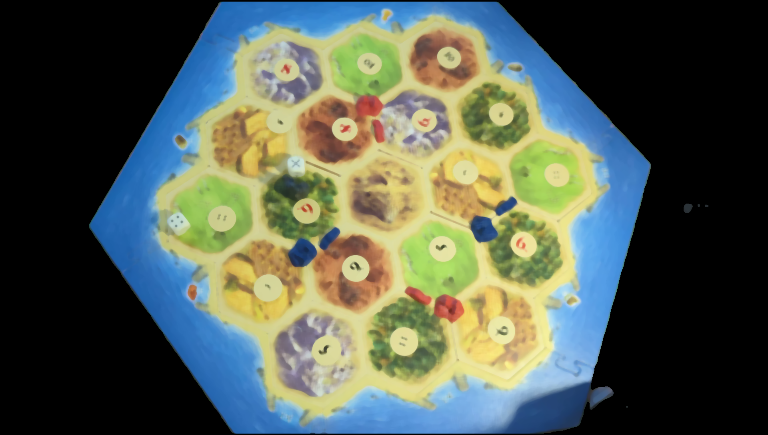

In [13]:
median = cv2.medianBlur(new, 11)
imshow(cv2.resize(median, None, fx=0.4, fy=0.4))

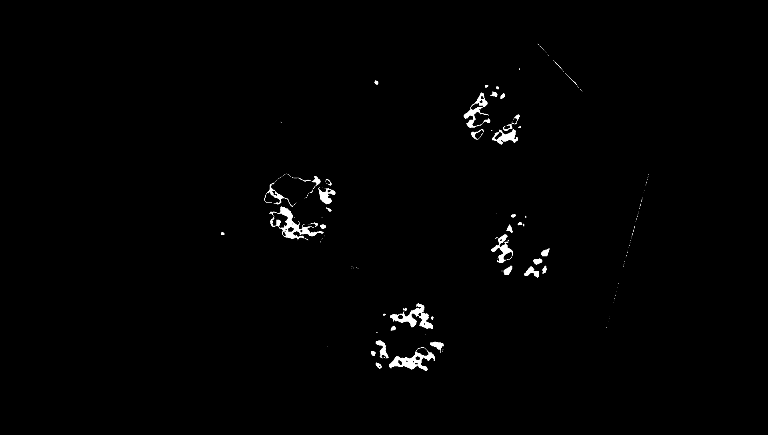

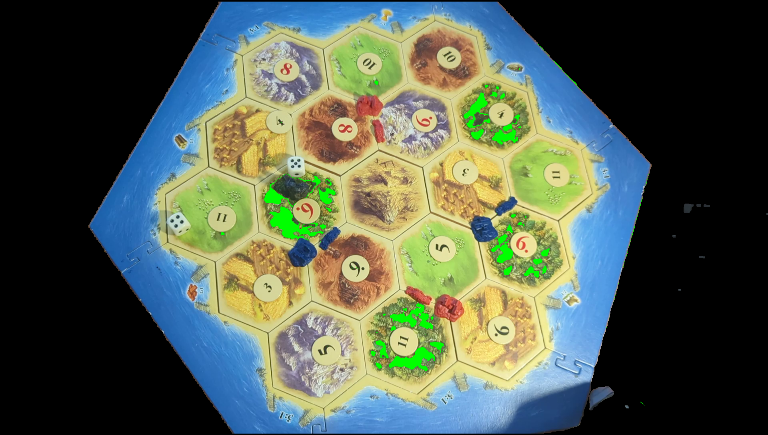

In [14]:
green = cv2.inRange(median, (0, 100, 0), (100, 255, 100))
imshow(cv2.resize(green, None, fx=0.4, fy=0.4))
contours, hierarchy = cv2.findContours(green,
                                       cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
color1 = new.copy()
filled2 = cv2.drawContours(color1, contours, -1, (0, 255, 0), -3)
imshow(cv2.resize(filled2, None, fx=0.4, fy=0.4))


Pomysły na Catan:
- wykrywanie pionków kolor + template matching
- wykrywanie pól na planszy znajdując krawędzie i sześciokąty - wziąć największe
- każdy z sześcianów kolorem/template matchingiem dopasować do typu
- wykryć koła używając Hough Circle, z kół liczby prostym OCR - tesserac?
- wykryć kostki i nr na nich
- dopasować cyfry do rodzaju pola
- dopasować nr na kostce do rodzaju pola
- dopasowac pionki do pól
- mierzenie dróg
- rozpoznawanie typu pionka - użycie convex hull i jego kształtu

## Cyclade

In [15]:
paths[8]

'./data\\cyklady_lvl1_1.mp4'

In [16]:
video = cv2.VideoCapture(paths[8])
if video.isOpened():
    print('Video loaded')
video_width = int(video.get(3))
video_height = int(video.get(4))

print(video_height, video_width)

video_fps = video.get(cv2.CAP_PROP_FPS)
print(video_fps)


Video loaded
1080 1920
29.99706778776856


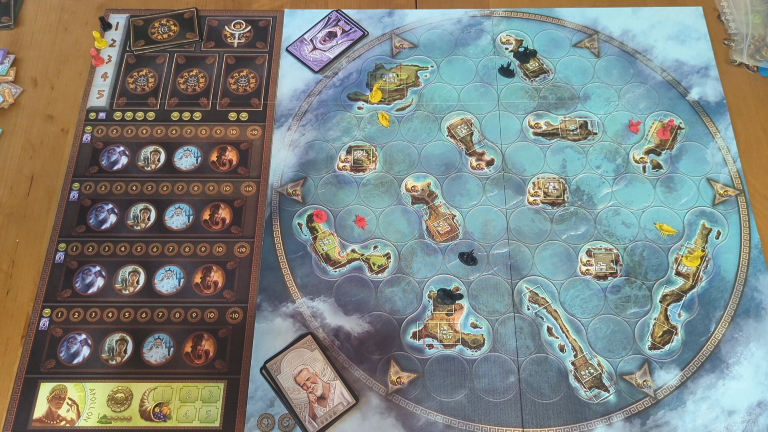

1800

In [51]:
first_frame2 = None
i = 0
while True:
    ret, frame = video.read()
    i += 1
    if ret:
        if i == 30 * 60:
            imshow(cv2.resize(frame, None, fx=0.4, fy=0.4))
            first_frame2 = frame
            break
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
i

In [52]:
def find_circles(frame):
    cframe = frame.copy()
    gray = cv2.cvtColor(cframe, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (7, 7), 0)
    circles = cv2.HoughCircles(
        blur, cv2.HOUGH_GRADIENT, 1.2, 150)
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(cframe, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # draw the center of the circle
        cv2.circle(cframe, (i[0], i[1]), 2, (0, 0, 255), 3)
    return cframe


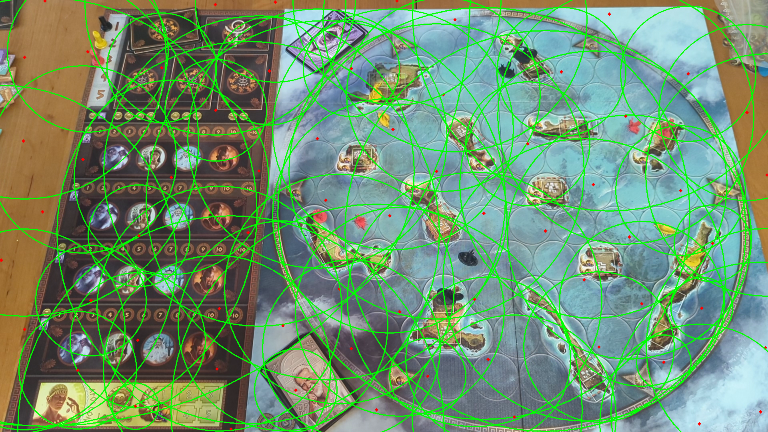

In [53]:
imshow(cv2.resize(find_circles(first_frame2), None, fx=0.4, fy=0.4))


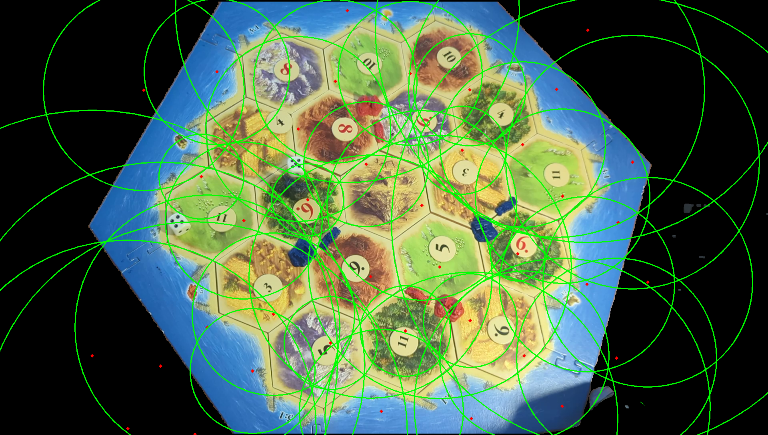

In [54]:
imshow(cv2.resize(find_circles(new), None, fx=0.4, fy=0.4))


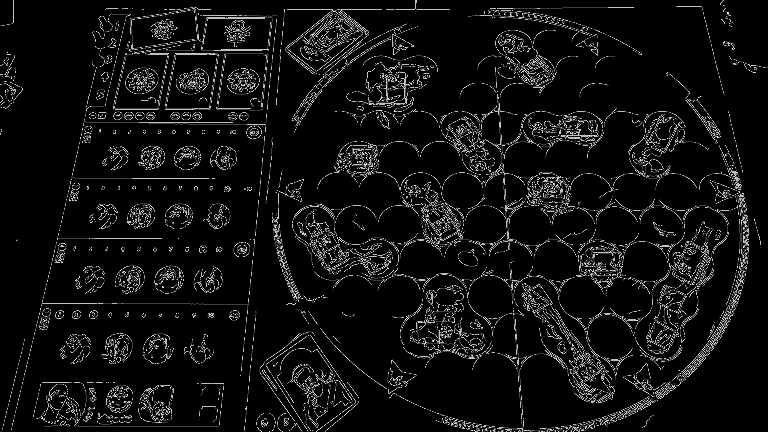

In [55]:
imshow(cv2.resize(detect_edges(first_frame2), None, fx=0.4, fy=0.4))


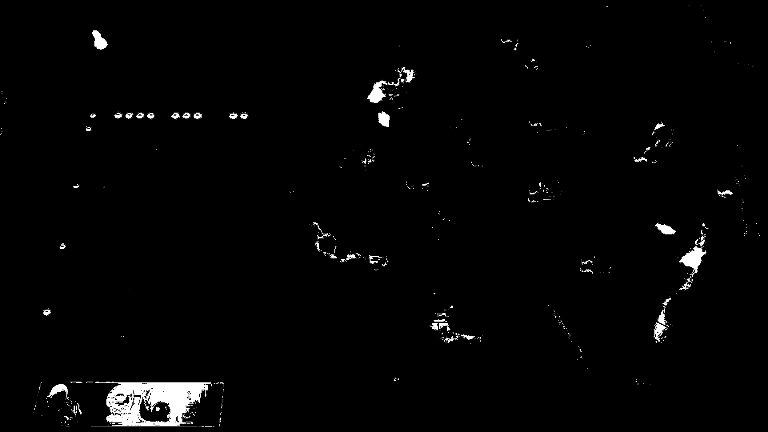

In [59]:
def segment_by_yellow(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    return mask

imshow(cv2.resize(segment_by_yellow(first_frame2), None, fx=0.4, fy=0.4))

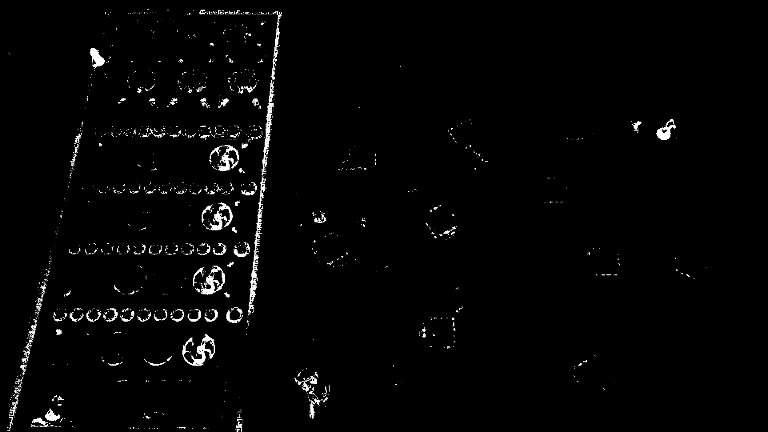

In [72]:
def segment_by_red(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    mask = cv2.inRange(hsv, lower_red, upper_red)
    return mask


imshow(cv2.resize(segment_by_red(first_frame2), None, fx=0.4, fy=0.4))
